In [201]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
#import libraries
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
#from xgboost import plot_importance, plot_tree
#import graphviz
from sklearn import metrics
#import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
import itertools
from functools import reduce
from scipy import stats

In [202]:
data = pd.read_csv("spektr.csv")

In [204]:
data.COL.value_counts()

3.0    959
1.0    315
6.0    233
5.0    219
7.0    135
4.0     10
2.0      6
Name: COL, dtype: int64

In [205]:
data=data.dropna(subset=['V', 'CON'])

In [207]:
data["COL"] = data["COL"].astype("category")

In [209]:
col = {1.0 :'G', 2.0 :'W', 3.0 :"PU", 5.0 :'O', 6.0 :'PI', 7.0 :'R'}
data["colors"] = data.COL.apply(lambda x: col[x])

In [211]:
X = data[["V", "MAS","CON"]].values
y = data.COL

In [212]:
X.shape

(289, 3)

In [214]:
# build a PCA model
pca = PCA(n_components=2)
X = StandardScaler().fit_transform(X)

In [215]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [216]:

# transform the digits data onto the first two principal components
X_pca = pca.transform(X)
#colors = list(mcolors.CSS4_COLORS)
colors = ["black", "green", "grey", "purple", "blue",
          "orange", "pink", "red", "#3A3120", "#535D8E"]

In [218]:
print (pca.explained_variance_ratio_.cumsum())

[0.66348127 0.95777678]


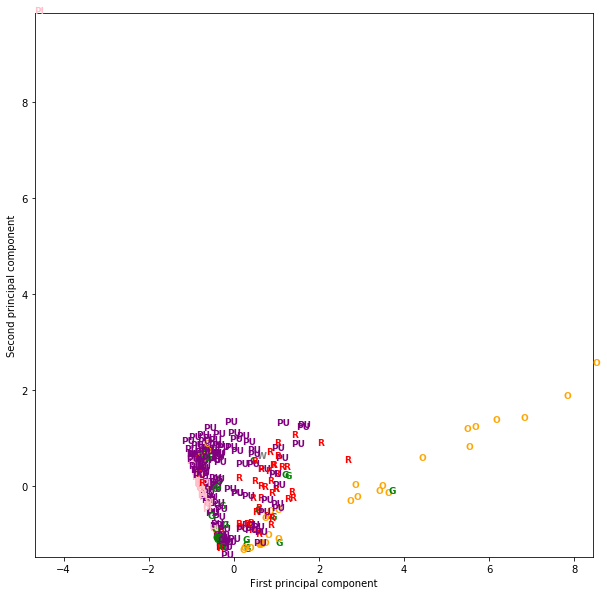

In [219]:
plt.figure(figsize=(10, 10))
plt.xlim(X_pca[:, 0].min(), X_pca[:, 0].max())
plt.ylim(X_pca[:, 1].min(), X_pca[:, 1].max())
for i in range(289):
    # actually plot the digits as text instead of using scatter
    plt.text(X_pca[i, 0], X_pca[i, 1], str(data.colors[i]),
             color = colors[int(y[i])],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.savefig("pca_colors.jpg")
plt.show()


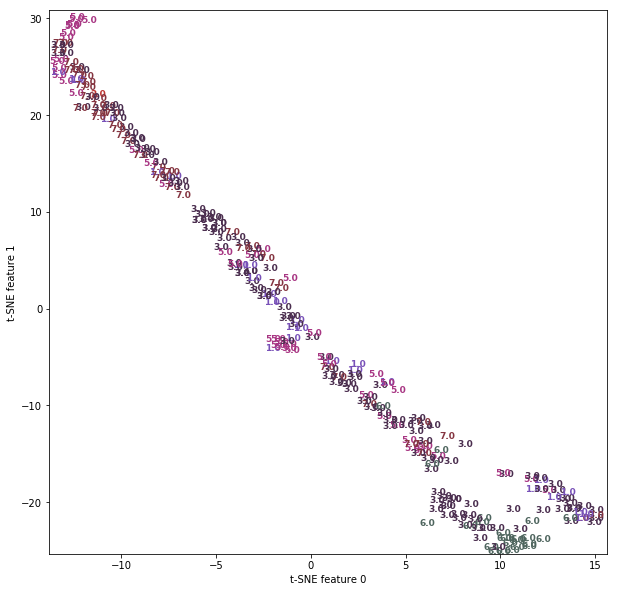

In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color = colors[int(y[i])],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.savefig("tsne.jpg")
plt.show()


In [15]:
y.value_counts()

3.0    162
7.0     38
5.0     36
1.0     28
6.0     24
2.0      1
Name: COL, dtype: int64

In [16]:
X = data[["CON"]].values
y = data.COL

0       3.0
12      1.0
13      1.0
14      1.0
15      1.0
56      1.0
89      3.0
90      3.0
91      3.0
107     7.0
108     7.0
109     7.0
116     5.0
117     5.0
118     5.0
119     5.0
120     5.0
121     5.0
122     5.0
123     5.0
124     5.0
125     5.0
126     5.0
127     5.0
128     5.0
129     5.0
130     5.0
131     5.0
162     7.0
163     7.0
       ... 
1683    3.0
1684    3.0
1685    3.0
1686    3.0
1687    3.0
1688    3.0
1689    3.0
1690    3.0
1691    3.0
1692    3.0
1693    3.0
1694    3.0
1695    3.0
1696    3.0
1697    3.0
1698    3.0
1699    3.0
1700    3.0
1701    3.0
1702    3.0
1703    3.0
1712    3.0
1713    3.0
1714    3.0
1715    3.0
1716    3.0
1822    1.0
1823    1.0
1824    1.0
1825    1.0
Name: COL, Length: 289, dtype: category
Categories (6, float64): [1.0, 2.0, 3.0, 5.0, 6.0, 7.0]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

models = [LogisticRegression(),
          DecisionTreeClassifier(),
          SVC(probability=True),  
          RandomForestClassifier(), 
          AdaBoostClassifier(),
         #xgb.XGBClassifier()
         ]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions = np.round(y_pred)

    accuracy = accuracy_score(y_test, predictions)
    print("%s accuracy: %.2f%%" % (model.__class__.__name__,accuracy * 100.0))



LogisticRegression accuracy: 60.34%
DecisionTreeClassifier accuracy: 53.45%
SVC accuracy: 55.17%
RandomForestClassifier accuracy: 55.17%
AdaBoostClassifier accuracy: 63.79%


In [19]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)


In [20]:
#plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
labels = ["green","white","purple", "orange", "pink", "red"]


Confusion matrix, without normalization
[[ 0  0  3  2  1  1]
 [ 0  0  0  1  0  0]
 [ 3  0 20  5  4  8]
 [ 0  0  3  4  0  3]
 [ 0  0  3  0  2  0]
 [ 4  0  2  2  0  2]]


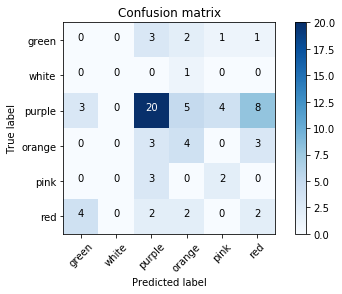

In [43]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=labels,
                      title='Confusion matrix')
plt.savefig("conf_mat_con.jpg")
plt.show()


In [44]:
## V
X = data[["V"]].values
y = data.COL
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          SVC(probability=True),  
          RandomForestClassifier(), 
          AdaBoostClassifier(),
         #xgb.XGBClassifier()
         ]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions = np.round(y_pred)

    accuracy = accuracy_score(y_test, predictions)
    print("%s accuracy: %.2f%%" % (model.__class__.__name__,accuracy * 100.0))


LogisticRegression accuracy: 63.79%
DecisionTreeClassifier accuracy: 60.34%
SVC accuracy: 67.24%
RandomForestClassifier accuracy: 68.97%
AdaBoostClassifier accuracy: 68.97%


In [45]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[ 0  0  6  0  0  0]
 [ 0  0  0  1  0  0]
 [ 3  0 29  2  0  1]
 [ 0  0  0  4  0  0]
 [ 0  0  2  0  3  0]
 [ 1  0  2  3  0  1]]


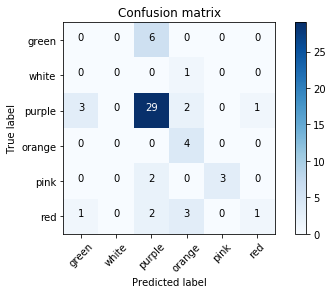

In [46]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=labels,
                      title='Confusion matrix')
plt.savefig("conf_mat_V.jpg")
plt.show()

In [47]:
X = data[["MAS"]].values
y = data.COL
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          SVC(probability=True),  
          RandomForestClassifier(), 
          AdaBoostClassifier(),
         #xgb.XGBClassifier()
         ]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions = np.round(y_pred)

    accuracy = accuracy_score(y_test, predictions)
    print("%s accuracy: %.2f%%" % (model.__class__.__name__,accuracy * 100.0))

LogisticRegression accuracy: 60.27%
DecisionTreeClassifier accuracy: 41.10%
SVC accuracy: 53.42%
RandomForestClassifier accuracy: 39.73%
AdaBoostClassifier accuracy: 54.79%


In [49]:
model =  LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[ 0  0  7  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0 39  0  0  1]
 [ 0  0  6  4  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  9  0  0  1]]


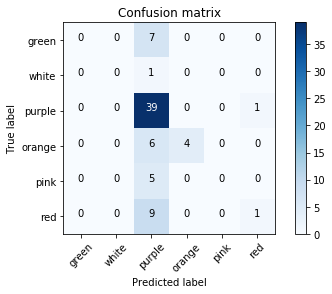

In [50]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=labels,
                      title='Confusion matrix')
plt.savefig("conf_mat_Mass.jpg")
plt.show()

In [125]:
species = data.SPE.unique()

In [107]:
df1 = data.groupby(['SPE']).agg({'V': 'mean', 
                                'CON': 'mean',
                                 'MAS': 'mean'                               
                                }).reset_index()

In [146]:
species

array(['Fritillaria_affinis', 'Fritillaria_amana',
       'Fritillaria_caucasica', 'Fritillaria_eastwoodiae',
       'Fritillaria_eduardii', 'Fritillaria_gentneri',
       'Fritillaria_messanensis', 'Fritillaria_graeca',
       'Fritillaria_imperialis', 'Fritillaria_kotschyana',
       'Fritillaria_liliacea', 'Fritillaria_meleagroides',
       'Fritillaria_michailovskyi', 'Fritillaria_minuta',
       'Fritillaria_montana', 'Fritillaria_persica',
       'Fritillaria_pontica', 'Fritillaria_pyrenaica',
       'Fritillaria_raddeana', 'Fritillaria_recurva',
       'Fritillaria_sewerzowii', 'Fritillaria_stenanthera',
       'Fritillaria_ussuriensis', 'Fritillaria_uva-vulpis',
       'Fritillaria_whittallii'], dtype=object)

In [131]:
for i in range(len(species)):
    mean_v.append(data.V[data.SPE == species[i]])

In [147]:
#retruns pollinator
def pollinator(name):
    if((name == 'Fritillaria_eduardii') | (name == 'Fritillaria_imperialis')):
        return "PAS"
    elif ((name == "Fritillaria_recurva") | (name == "Fritillaria_gentneri")):
        return "HUM"
    else:
        return "INS"

In [148]:
data['Pollinator'] = data['SPE'].apply(pollinator)

In [150]:
ins_V = data.V[data.Pollinator == "INS"]
pas_V = data.V[data.Pollinator == "PAS"]
hum_V = data.V[data.Pollinator == "HUM"]

In [152]:

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(ins_V, pas_V, hum_V)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)



In [153]:

f, p = stats.f_oneway(ins_V,
                      pas_V,
                      hum_V)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')



One-way ANOVA
F value: 154.59908195255903
P value: 3.0460455674018406e-46 



In [156]:
#Then, do the multiple testing
multiComp = MultiComparison(data['V'], data['Pollinator'])

In [157]:
print((multiComp.tukeyhsd().summary()))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
 HUM    INS   -38.0307 -55.9716 -20.0898  True 
 HUM    PAS   92.8164  69.4286  116.2043  True 
 INS    PAS   130.8472 113.1223 148.572   True 
-----------------------------------------------


In [159]:
ins_mass = data.MAS[data.Pollinator == "INS"]
pas_mass = data.MAS[data.Pollinator == "PAS"]
hum_mass = data.MAS[data.Pollinator == "HUM"]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(ins_mass, pas_mass, hum_mass)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(ins_V,
                      pas_V,
                      hum_V)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(data['MAS'], data['Pollinator'])

print(multiComp.tukeyhsd().summary())

One-way ANOVA
F value: 154.59908195255903
P value: 3.0460455674018406e-46 

 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper   reject
----------------------------------------------------
 HUM    INS   -1048.2323 -1411.6372 -684.8275  True 
 HUM    PAS    264.3306  -209.4057   738.0669 False 
 INS    PAS    1312.563   953.5335  1671.5924  True 
----------------------------------------------------


In [160]:
ins_CON = data.CON[data.Pollinator == "INS"]
pas_CON = data.CON[data.Pollinator == "PAS"]
hum_CON = data.CON[data.Pollinator == "HUM"]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(ins_CON, pas_CON, hum_CON)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(ins_CON,
                      pas_CON,
                      hum_CON)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(data['CON'], data['Pollinator'])

print(multiComp.tukeyhsd().summary())

One-way ANOVA
F value: 37.6507532186091
P value: 3.0546769738777226e-15 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
 HUM    INS   16.5065   5.7793  27.2337   True 
 HUM    PAS   -20.8909 -34.8749 -6.9068   True 
 INS    PAS   -37.3974 -47.9954 -26.7993  True 
-----------------------------------------------


In [163]:
GREEN_CON = data.CON[data.COL == 1.0]
WHITE_CON = data.CON[data.COL == 2.0]
PURPLE_CON = data.CON[data.COL == 3.0]
ORANGE_CON = data.CON[data.COL == 5.0]
PINK_CON = data.CON[data.COL == 6.0]
RED_CON = data.CON[data.COL == 7.0]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(GREEN_CON, WHITE_CON, PURPLE_CON, ORANGE_CON, PINK_CON, RED_CON)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(GREEN_CON,
                      WHITE_CON,
                      PURPLE_CON,
                      ORANGE_CON,
                      PINK_CON,
                      RED_CON)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(data['CON'], data['colors'])

print(multiComp.tukeyhsd().summary())

One-way ANOVA
F value: 18.953279859525107
P value: 2.9623121717586234e-16 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  G      O    -28.6919 -46.3709 -11.0128  True 
  G      PI   23.3658   3.8486  42.8829   True 
  G      PU    8.6086  -5.7509  22.9681  False 
  G      R    -8.9465  -26.4209  8.5278  False 
  G      W     9.3554  -62.0481 80.7588  False 
  O      PI   52.0576  33.5684  70.5468   True 
  O      PU   37.3005  24.3727  50.2283   True 
  O      R    19.7453   3.4271  36.0635   True 
  O      W    38.0472  -33.0822 109.1766 False 
  PI     PU   -14.7571 -30.1031  0.5888  False 
  PI     R    -32.3123 -50.6059 -14.0188  True 
  PI     W    -14.0104 -85.6188 57.5979  False 
  PU     R    -17.5552 -30.2015 -4.9088   True 
  PU     W     0.7467  -69.6311 71.1245  False 
  R      W    18.3019  -52.7769 89.3807  False 
-----------------------------------------------


In [164]:
GREEN_V = data.V[data.COL == 1.0]
WHITE_V = data.V[data.COL == 2.0]
PURPLE_V = data.V[data.COL == 3.0]
ORANGE_V = data.V[data.COL == 5.0]
PINK_V = data.V[data.COL == 6.0]
RED_V = data.V[data.COL == 7.0]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(GREEN_V, WHITE_V, PURPLE_V, ORANGE_V, PINK_V, RED_V)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(GREEN_V,
                      WHITE_V,
                      PURPLE_V,
                      ORANGE_V,
                      PINK_V,
                      RED_V)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(data['V'], data['colors'])

print(multiComp.tukeyhsd().summary())

One-way ANOVA
F value: 62.25444477894219
P value: 1.2587812351676428e-43 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower     upper   reject
--------------------------------------------------
  G      O     126.9113  96.6539   157.1686  True 
  G      PI    -14.2026  -47.6058  19.2006  False 
  G      PU    -3.6641   -28.2401  20.9119  False 
  G      R     32.9082    3.0013   62.8151   True 
  G      W     19.2307  -102.9748  141.4362 False 
  O      PI   -141.1139 -172.7578  -109.47   True 
  O      PU   -130.5754 -152.7009 -108.4498  True 
  O      R     -94.0031 -121.9313  -66.0748  True 
  O      W    -107.6806 -229.4169  14.0558  False 
  PI     PU    10.5385   -15.7257  36.8027  False 
  PI     R     47.1108   15.8018   78.4198   True 
  PI     W     33.4333   -89.1228  155.9895 False 
  PU     R     36.5723   14.9284   58.2162   True 
  PU     W     22.8948   -97.5553  143.3449 False 
  R      W     -13.6775 -135.3273  107.9723 False 
-------

In [165]:
GREEN_MAS = data.MAS[data.COL == 1.0]
WHITE_MAS = data.MAS[data.COL == 2.0]
PURPLE_MAS = data.MAS[data.COL == 3.0]
ORANGE_MAS = data.MAS[data.COL == 5.0]
PINK_MAS = data.MAS[data.COL == 6.0]
RED_MAS = data.MAS[data.COL == 7.0]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(GREEN_MAS, WHITE_MAS, PURPLE_MAS, ORANGE_MAS, PINK_MAS, RED_MAS)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(GREEN_MAS,
                      WHITE_MAS,
                      PURPLE_MAS,
                      ORANGE_MAS,
                      PINK_MAS,
                      RED_MAS)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(data['MAS'], data['colors'])

print(multiComp.tukeyhsd().summary())

One-way ANOVA
F value: 22.208323677558766
P value: 8.980767290117453e-19 

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper    reject
-----------------------------------------------------
  G      O     1207.135   596.2653  1818.0048   True 
  G      PI   -488.9612  -1163.3431  185.4207  False 
  G      PU    -76.7183  -572.8868   419.4501  False 
  G      R     870.0434   266.2476  1473.8391   True 
  G      W    1116.6642  -1350.5614 3583.8898  False 
  O      PI   -1696.0963 -2334.9591 -1057.2334  True 
  O      PU   -1283.8534 -1730.5501 -837.1567   True 
  O      R    -337.0917  -900.9392   226.7558  False 
  O      W     -90.4708  -2548.2253 2367.2836  False 
  PI     PU    412.2429   -118.009   942.4948  False 
  PI     R    1359.0046   726.9024  1991.1068   True 
  PI     W    1605.6254  -868.6798  4079.9306  False 
  PU     R     946.7617   509.7887  1383.7347   True 
  PU     W    1193.3825  -1238.4025 3625.1676  False 
  R    

In [175]:
data = pd.read_csv("spektr.csv")
df2 = data.dropna(subset=['ENT'])
col = {1.0 :'G', 2.0 :'W', 3.0 :"PU", 4.0 :"Y", 5.0 :'O', 6.0 :'PI', 7.0 :'R'}
df2["colors"] = df2.COL.apply(lambda x: col[x])
df2['Pollinator'] = df2['SPE'].apply(pollinator)

/home/agata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/agata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [221]:
ins_ENT = df2.ENT[df2.Pollinator == "INS"]
pas_ENT = df2.ENT[df2.Pollinator == "PAS"]
hum_ENT = df2.ENT[df2.Pollinator == "HUM"]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(ins_ENT, pas_ENT, hum_ENT)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(ins_ENT,
                      pas_ENT,
                      hum_ENT)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(df2['ENT'], df2['Pollinator'])

print(multiComp.tukeyhsd().summary())

One-way ANOVA
F value: 56.60400313722982
P value: 2.7233132688435272e-21 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 HUM    INS   10.6985   3.3706 18.0264  True 
 HUM    PAS    32.448  23.8176 41.0783  True 
 INS    PAS   21.7495  16.4715 27.0274  True 
---------------------------------------------


In [179]:
GREEN_ENT = data.ENT[data.COL == 1.0]
WHITE_ENT = data.ENT[data.COL == 2.0]
PURPLE_ENT = data.ENT[data.COL == 3.0]
YELLOW_ENT = data.ENT[data.COL == 4.0]
ORANGE_ENT = data.ENT[data.COL == 5.0]
PINK_ENT = data.ENT[data.COL == 6.0]
RED_ENT = data.ENT[data.COL == 7.0]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(GREEN_ENT, WHITE_ENT, PURPLE_ENT, YELLOW_ENT, ORANGE_ENT, PINK_ENT, RED_ENT)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(GREEN_ENT,
                      WHITE_ENT,
                      PURPLE_ENT,
                      ORANGE_ENT,
                      YELLOW_ENT,
                      PINK_ENT,
                      RED_ENT)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(df2['ENT'], df2['colors'])

print(multiComp.tukeyhsd().summary())

OK nan
One-way ANOVA
F value: nan
P value: nan 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  G      O     7.1927   0.4439  13.9416   True 
  G      PI   -18.5131 -24.9057 -12.1206  True 
  G      PU   -18.3553 -23.3787 -13.332   True 
  G      R    -24.8045 -33.2147 -16.3942  True 
  G      W    -12.9921 -43.0227 17.0384  False 
  G      Y    -18.5921 -48.6227 11.4384  False 
  O      PI   -25.7058 -32.6941 -18.7176  True 
  O      PU   -25.5481 -31.3104 -19.7857  True 
  O      R    -31.9972 -40.8687 -23.1257  True 
  O      W    -20.1848 -50.3478  9.9781  False 
  O      Y    -25.7848 -55.9478  4.3781  False 
  PI     PU    0.1578  -5.1828   5.4984  False 
  PI     R    -6.2914  -14.8948  2.3121  False 
  PI     W     5.521   -24.5643 35.6063  False 
  PI     Y     -0.079  -30.1643 30.0063  False 
  PU     R    -6.4491  -14.0904  1.1922  False 
  PU     W     5.3632  -24.4611 35.1

/home/agata/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [224]:
data = pd.read_csv("spektr.csv")
df3 = data.dropna(subset=['TEP'])
col = {1.0 :'G', 2.0 :'W', 3.0 :"PU", 4.0 :"Y", 5.0 :'O', 6.0 :'PI', 7.0 :'R'}
df3["colors"] = df3.COL.apply(lambda x: col[x])
df3['Pollinator'] = df3['SPE'].apply(pollinator)

/home/agata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/agata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [225]:
ins_TEP = df3.TEP[df3.Pollinator == "INS"]
pas_TEP = df3.TEP[df3.Pollinator == "PAS"]
hum_TEP = df3.TEP[df3.Pollinator == "HUM"]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(ins_TEP, pas_TEP, hum_TEP)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(ins_TEP,
                      pas_TEP,
                      hum_TEP)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(df3['TEP'], df3['Pollinator'])

print(multiComp.tukeyhsd().summary())

One-way ANOVA
F value: 415.09269305529534
P value: 2.0236823614982007e-145 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 HUM    INS   -5.2398  -7.0735 -3.4061  True 
 HUM    PAS   10.7912   8.6312 12.9512  True 
 INS    PAS    16.031   14.712  17.35   True 
---------------------------------------------


In [226]:
GREEN_TEP = df3.TEP[df3.COL == 1.0]
WHITE_TEP = df3.TEP[df3.COL == 2.0]
PURPLE_TEP = df3.TEP[df3.COL == 3.0]
YELLOW_TEP = df3.TEP[df3.COL == 4.0]
ORANGE_TEP = df3.TEP[df3.COL == 5.0]
PINK_TEP = df3.TEP[df3.COL == 6.0]
RED_TEP = df3.TEP[df3.COL == 7.0]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(GREEN_TEP, WHITE_TEP, PURPLE_TEP, YELLOW_TEP, ORANGE_TEP, PINK_TEP, RED_TEP)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(GREEN_TEP,
                      WHITE_TEP,
                      PURPLE_TEP,
                      ORANGE_TEP,
                      YELLOW_TEP,
                      PINK_TEP,
                      RED_TEP)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(df3['TEP'], df3['colors'])

print(multiComp.tukeyhsd().summary())

One-way ANOVA
F value: 290.9962633308765
P value: 1.8813744029267322e-250 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  G      O     8.8973   7.209   10.5855   True 
  G      PI   -12.7243 -14.3616 -11.087   True 
  G      PU   -8.1998  -9.4338  -6.9657   True 
  G      R    -2.7156  -4.8174  -0.6138   True 
  G      W    -16.8178 -24.2489 -9.3867   True 
  G      Y    -10.7512 -18.1823  -3.32    True 
  O      PI   -21.6216 -23.4442 -19.799   True 
  O      PU   -17.097  -18.5681 -15.6259  True 
  O      R    -11.6129 -13.8621 -9.3637   True 
  O      W    -25.7151 -33.1892 -18.241   True 
  O      Y    -19.6484 -27.1226 -12.1743  True 
  PI     PU    4.5245   3.1122   5.9369   True 
  PI     R    10.0087   7.7975  12.2199   True 
  PI     W    -4.0935  -11.5563  3.3693  False 
  PI     Y     1.9731  -5.4897   9.4359  False 
  PU     R     5.4841   3.5524   7.4159   True 
  PU     

In [232]:
data = pd.read_csv("spektr.csv")
df3 = data.dropna(subset=['TH'])
col = {1.0 :'G', 2.0 :'W', 3.0 :"PU", 4.0 :"Y", 5.0 :'O', 6.0 :'PI', 7.0 :'R'}
df3["colors"] = df3.COL.apply(lambda x: col[x])
df3['Pollinator'] = df3['SPE'].apply(pollinator)

/home/agata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/agata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [233]:
ins_TH = df3.TH[df3.Pollinator == "INS"]
pas_TH = df3.TH[df3.Pollinator == "PAS"]
hum_TH = df3.TH[df3.Pollinator == "HUM"]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(ins_TH, pas_TH, hum_TH)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(ins_TH,
                      pas_TH,
                      hum_TH)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(df3['TH'], df3['Pollinator'])

print(multiComp.tukeyhsd().summary())

OK 0.7280334579884398
One-way ANOVA
F value: 66.33327846782151
P value: 7.17513260494726e-24 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
 HUM    INS   73.4012  -34.494  181.2964 False 
 HUM    PAS   453.9735 325.1629 582.7842  True 
 INS    PAS   380.5723 300.6947  460.45   True 
-----------------------------------------------


In [234]:
GREEN_TH = df3.TH[df3.COL == 1.0]
WHITE_TH = df3.TH[df3.COL == 2.0]
PURPLE_TH = df3.TH[df3.COL == 3.0]
YELLOW_TH = df3.TH[df3.COL == 4.0]
ORANGE_TH = df3.TH[df3.COL == 5.0]
PINK_TH = df3.TH[df3.COL == 6.0]
RED_TH = df3.TH[df3.COL == 7.0]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(GREEN_TH, WHITE_TH, PURPLE_TH, YELLOW_TH, ORANGE_TH, PINK_TH, RED_TH)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(GREEN_TH,
                      WHITE_TH,
                      PURPLE_TH,
                      ORANGE_TH,
                      YELLOW_TH,
                      PINK_TH,
                      RED_TH)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(df3['TH'], df3['colors'])

print(multiComp.tukeyhsd().summary())

One-way ANOVA
F value: 27.588475322457334
P value: 3.7707534552522845e-25 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower     upper   reject
--------------------------------------------------
  G      O     314.4484  194.0715  434.8254  True 
  G      PI   -164.6108 -310.1873  -19.0343  True 
  G      PU    -76.4079  -164.388  11.5721  False 
  G      R    -138.6858 -263.3364  -14.0352  True 
  G      W     -90.8108 -317.4186  135.797  False 
  G      Y     96.0642   -89.3728  281.5012 False 
  O      PI   -479.0593  -632.215 -325.9036  True 
  O      PU   -390.8564 -490.8796 -290.8332  True 
  O      R    -453.1343 -586.5582 -319.7104  True 
  O      W    -405.2593 -636.8089 -173.7096  True 
  O      Y    -218.3843 -409.8289  -26.9396  True 
  PI     PU    88.2029   -41.0509  217.4567 False 
  PI     R      25.925   -130.612  182.462  False 
  PI     W       73.8   -171.7955  319.3955 False 
  PI     Y     260.675   52.4613   468.8887  True 
  PU  

In [235]:
df3 = data.dropna(subset=['AA'])
col = {1.0 :'G', 2.0 :'W', 3.0 :"PU", 4.0 :"Y", 5.0 :'O', 6.0 :'PI', 7.0 :'R'}
df3["colors"] = df3.COL.apply(lambda x: col[x])
df3['Pollinator'] = df3['SPE'].apply(pollinator)

/home/agata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/agata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [236]:
ins_AA = df3.AA[df3.Pollinator == "INS"]
pas_AA = df3.AA[df3.Pollinator == "PAS"]
hum_AA = df3.AA[df3.Pollinator == "HUM"]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(ins_AA, pas_AA, hum_AA)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(ins_AA,
                      pas_AA,
                      hum_AA)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(df3['AA'], df3['Pollinator'])

print(multiComp.tukeyhsd().summary())

One-way ANOVA
F value: 12.29217985781176
P value: 0.00037542037690169405 

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
group1 group2  meandiff     lower      upper    reject
------------------------------------------------------
 HUM    INS   3282.8889  -15916.6319 22482.4097 False 
 HUM    PAS    40104.5    14345.6398 65863.3602  True 
 INS    PAS   36821.6111  17622.0903 56021.1319  True 
------------------------------------------------------


In [239]:
df3.COL.unique()

array([3, 1, 7, 5, 2, 6])

In [240]:
GREEN_AA = df3.AA[df3.COL == 1.0]
WHITE_AA = df3.AA[df3.COL == 2.0]
PURPLE_AA = df3.AA[df3.COL == 3.0]
ORANGE_AA = df3.AA[df3.COL == 5.0]
PINK_AA = df3.AA[df3.COL == 6.0]
RED_AA = df3.AA[df3.COL == 7.0]

# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(GREEN_AA, WHITE_AA, PURPLE_AA, ORANGE_AA, PINK_AA, RED_AA)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    
    print('OK', p)
    
f, p = stats.f_oneway(GREEN_AA,
                      WHITE_AA,
                      PURPLE_AA,
                      ORANGE_AA,
                      PINK_AA,
                      RED_AA)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

#Then, do the multiple testing
multiComp = MultiComparison(df3['AA'], df3['colors'])

print(multiComp.tukeyhsd().summary())

One-way ANOVA
F value: 4.210029428497081
P value: 0.012391177313207968 

 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2 meandiff    lower      upper    reject
----------------------------------------------------
  G      O    36328.4   6670.7385  65986.0615  True 
  G      PI   -2576.6  -41407.5939 36254.3939 False 
  G      PU    -142.6  -19558.0969 19272.8969 False 
  G      R    -3800.6  -29687.9292 22086.7292 False 
  G      W    -1025.6  -39856.5939 37805.3939 False 
  O      PI   -38905.0  -82319.371  4509.371  False 
  O      PU   -36471.0 -63928.6591 -9013.3409  True 
  O      R    -40129.0 -72488.1616 -7769.8384  True 
  O      W    -37354.0  -80768.371  6060.371  False 
  PI     PU    2434.0  -34743.8462 39611.8462 False 
  PI     R    -1224.0  -42155.4615 39707.4615 False 
  PI     W     1551.0  -48579.5975 51681.5975 False 
  PU     R    -3658.0  -26992.5232 19676.5232 False 
  PU     W     -883.0  -38060.8462 36294.8462 False 
  R      W     2775.0  -38